Input sized of EfficientNet variants

For B0 to B7 base models, the input shapes are different. Here is a list of input shape expected for each model:

| Base model    | resolution |
|---------------|------------|
| EfficientNetB0 | 224        |
| EfficientNetB1 | 240        |
| EfficientNetB2 | 260        |
| EfficientNetB3 | 300        |
| EfficientNetB4 | 380        |
| EfficientNetB5 | 456        |
| EfficientNetB6 | 528        |
| EfficientNetB7 | 600        |

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!mkdir -p /content/DATA
!cp /content/gdrive/MyDrive/DATA/flowerdata-module5.zip /content/DATA

In [3]:
!unzip -qq -d /content/DATA/flowerdata-module5 /content/DATA/flowerdata-module5.zip

In [4]:
!ls /content/DATA

flowerdata-module5  flowerdata-module5.zip


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# from keras.preprocessing import image
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# from keras.models import load_model
# from tensorflow.keras.applications import ResNet101V2

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [115]:
DATA_DIR = '/content/DATA/flowerdata-module5/train/train'

BATCH_SIZE = 32
# IMAGE_SIZE = (224, 224) # B0
IMAGE_SIZE = (380, 380) # B4

# IMAGE_SIZE = (256, 256) ResNet101V2

In [116]:
VALIDATION_SPLIT = 0.2
SEED = 42
STEP = 1e-3
FINE_TUNING_STEP = 1e-4
EPOCHS = 11

In [45]:
train_datagen = ImageDataGenerator(
    validation_split = VALIDATION_SPLIT,
    rescale=1./255,
    shear_range = 10,
    channel_shift_range = 30,
    zoom_range=0.3,
    rotation_range = 180,
    brightness_range = [0.7, 1.3],
    fill_mode = "nearest",
    horizontal_flip=True,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split = VALIDATION_SPLIT,
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    seed=SEED,
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    # class_mode='sparse',
)

validation_generator = validation_datagen.flow_from_directory(
    DATA_DIR,
    seed=SEED,
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    # class_mode='sparse',
)

Found 5283 images belonging to 102 classes.
Found 1269 images belonging to 102 classes.


In [117]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    label_mode='categorical',
    shuffle=True,
    seed=SEED,
    validation_split=VALIDATION_SPLIT,
    subset='training',
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    label_mode='categorical',
    shuffle=True,
    seed=SEED,
    validation_split=VALIDATION_SPLIT,
    subset='validation',
)

Found 6552 files belonging to 102 classes.
Using 5242 files for training.
Found 6552 files belonging to 102 classes.
Using 1310 files for validation.


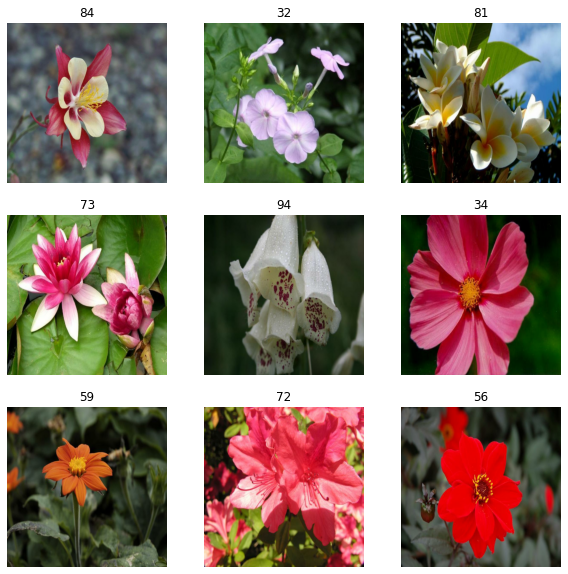

In [118]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images[i].numpy()
    label = labels[i].numpy()
    class_index = label.argmax()
    plt.imshow(img.astype("uint8"))
    plt.title(class_names[class_index])
    plt.axis("off")

In [119]:
NUM_CLASSES = len(train_dataset.class_names)
print(f'NUM_CLASSES={NUM_CLASSES}')

NUM_CLASSES=102


In [72]:
data_augmentation = tf.keras.Sequential([
    # tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

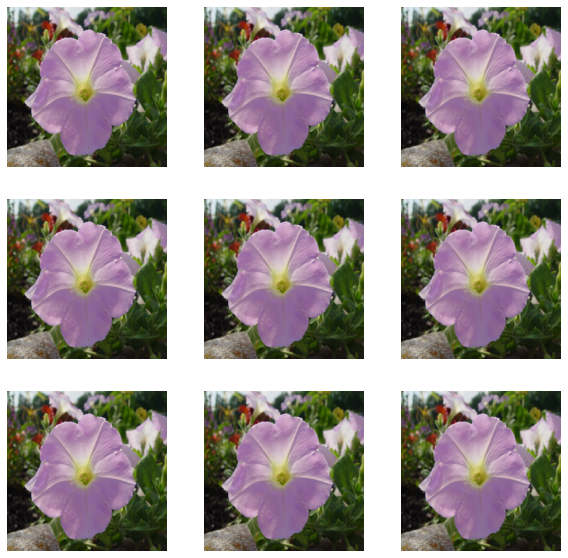

In [101]:
# Add the image to a batch.
# image = tf.io.read_file('/content/DATA/flowerdata-module5/test/test/image_00028.jpg')
# image = tf.image.decode_jpeg(image, channels=3)
# image = tf.image.convert_image_dtype(image, dtype=tf.float32)
# image = tf.image.resize(image, (380, 380))

image = batch[0]
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

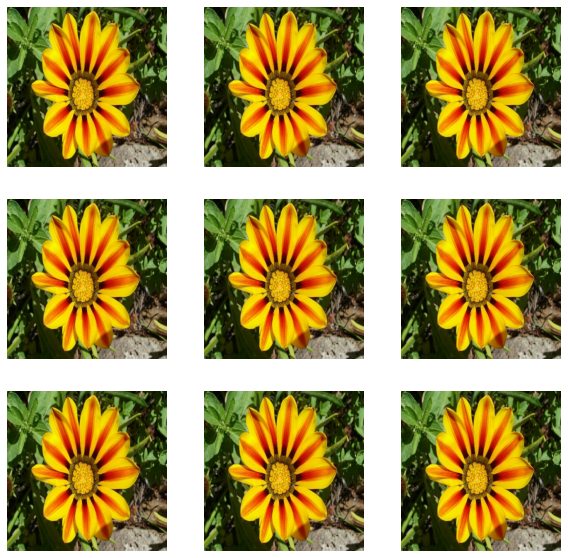

In [109]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


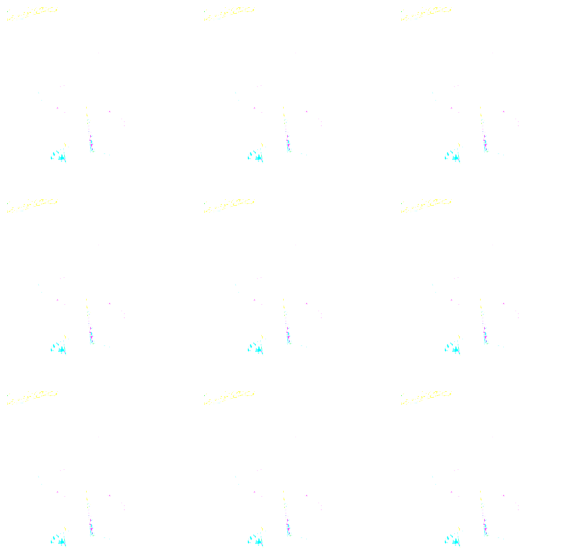

In [74]:
for batch, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented = data_augmentation(batch)
    image = augmented[0]
    plt.imshow(image / 255)
    plt.axis('off')

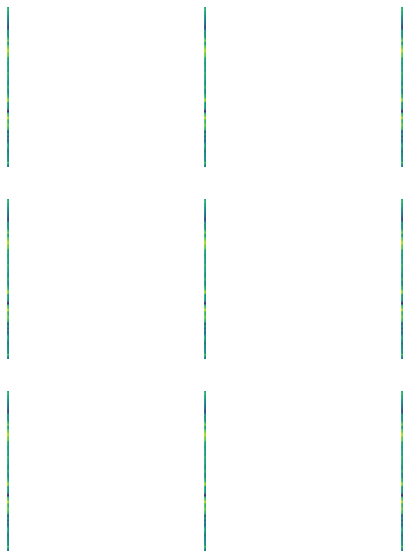

In [48]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [23]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

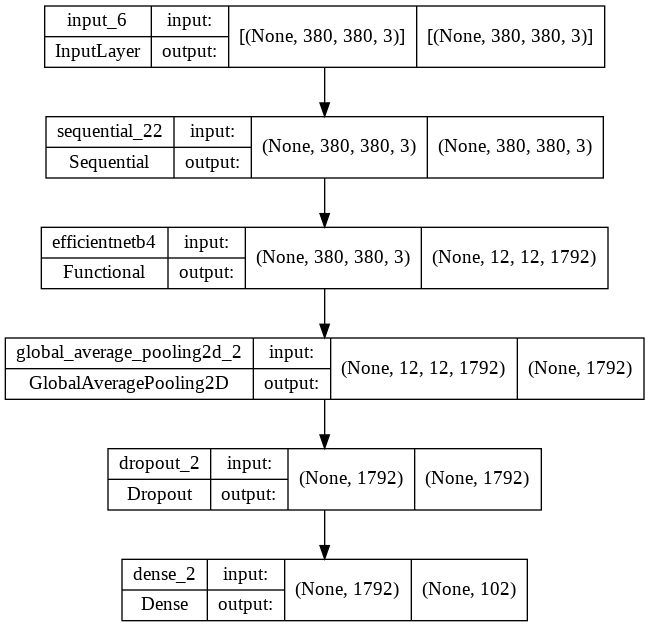

In [120]:
base_model = tf.keras.applications.EfficientNetB4(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights='imagenet',
)
base_model.trainable = False

inputs = tf.keras.Input(shape=IMAGE_SIZE + (3,))
x = data_augmentation(inputs)
# x = layers.Rescaling(1.0 / 255)(x)
x = preprocess_input(x)
x = base_model(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = prediction_layer(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model, show_shapes = True)

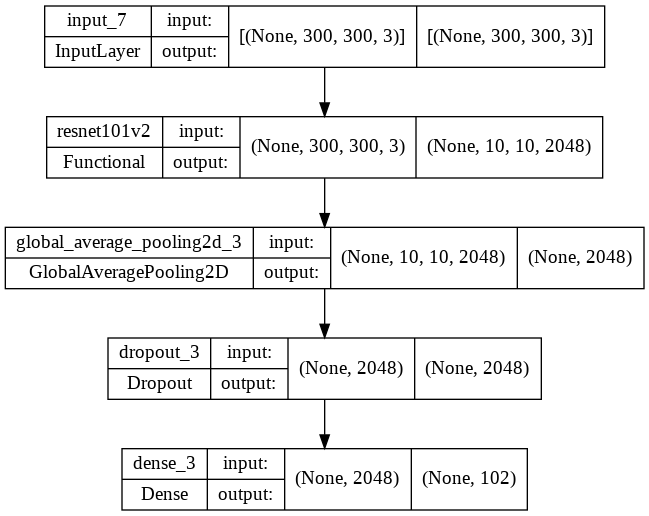

In [51]:
inputs = tf.keras.Input(shape = IMAGE_SIZE + (3,))

# base_model = tf.keras.applications.ResNet101V2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=IMAGE_SIZE + (3,),
# )
base_model = tf.keras.applications.EfficientNetB4(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights='imagenet',
)
base_model.trainable = False

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model, show_shapes = True)

In [121]:
early_stoping = tf.keras.callbacks.EarlyStopping(
    # monitor='val_sparse_categorical_accuracy', 
    monitor='val_categorical_accuracy', 
    mode='max', 
    verbose=1, 
    patience=7
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = "best_model.hdf5",
    # monitor='val_sparse_categorical_accuracy', 
    monitor='val_categorical_accuracy', 
    mode='max', 
    verbose=1, 
    save_best_only=True
)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    # monitor='val_sparse_categorical_accuracy', 
    monitor='val_categorical_accuracy', 
    factor=0.6, 
    min_lr=1e-7
)

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(STEP),
    loss="categorical_crossentropy",
    metrics=["CategoricalAccuracy"]
)

In [53]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[
        early_stoping,
        learning_rate_reduction,
        model_checkpoint,
    ],
)

Epoch 1/11
83/83 [==============================] - ETA: 0s - loss: 3.5549 - categorical_accuracy: 0.2271
Epoch 1: val_categorical_accuracy improved from -inf to 0.57368, saving model to /content/best_model.hdf5
83/83 [==============================] - 234s 3s/step - loss: 3.5549 - categorical_accuracy: 0.2271 - val_loss: 2.0973 - val_categorical_accuracy: 0.5737 - lr: 0.0010
Epoch 2/11
83/83 [==============================] - ETA: 0s - loss: 1.8545 - categorical_accuracy: 0.5745
Epoch 2: val_categorical_accuracy improved from 0.57368 to 0.71552, saving model to /content/best_model.hdf5
83/83 [==============================] - 216s 3s/step - loss: 1.8545 - categorical_accuracy: 0.5745 - val_loss: 1.3645 - val_categorical_accuracy: 0.7155 - lr: 0.0010
Epoch 3/11
83/83 [==============================] - ETA: 0s - loss: 1.3149 - categorical_accuracy: 0.6962
Epoch 3: val_categorical_accuracy improved from 0.71552 to 0.78487, saving model to /content/best_model.hdf5
83/83 [=================

In [ ]:
model = load_model(PATH+"best_model.hdf5")

## Fine Tune

In [122]:
base_model.trainable = True

base_model_layers = len(base_model.layers)
no_fine_tune_layers = int(best_model_layers_cnt * 2/3)

print(f'{base_model_layers - no_fine_tune_layers} trainable of {base_model_layers} layers')

for layer in base_model.layers[:no_fine_tune_layers]:
  layer.trainable =  False

158 trainable of 474 layers


In [123]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(STEP),
    loss="categorical_crossentropy",
    metrics=["CategoricalAccuracy"]
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
    callbacks=[early_stoping, learning_rate_reduction, model_checkpoint],
)

Epoch 1/25
164/164 [==============================] - ETA: 0s - loss: 1.6234 - categorical_accuracy: 0.6112
Epoch 1: val_categorical_accuracy improved from -inf to 0.89008, saving model to best_model.hdf5
164/164 [==============================] - 315s 2s/step - loss: 1.6234 - categorical_accuracy: 0.6112 - val_loss: 0.3953 - val_categorical_accuracy: 0.8901 - lr: 0.0010
Epoch 2/25
164/164 [==============================] - ETA: 0s - loss: 0.3908 - categorical_accuracy: 0.8941
Epoch 2: val_categorical_accuracy did not improve from 0.89008
164/164 [==============================] - 283s 2s/step - loss: 0.3908 - categorical_accuracy: 0.8941 - val_loss: 0.4349 - val_categorical_accuracy: 0.8794 - lr: 0.0010
Epoch 3/25
164/164 [==============================] - ETA: 0s - loss: 0.1857 - categorical_accuracy: 0.9485
Epoch 3: val_categorical_accuracy improved from 0.89008 to 0.93130, saving model to best_model.hdf5
164/164 [==============================] - 286s 2s/step - loss: 0.1857 - categ

In [59]:
submission = pd.read_csv('/content/DATA/flowerdata-module5/sample_submission.csv')
submission.head()

,Id,Category
0,image_00028.jpg,1
1,image_00059.jpg,1
2,image_00061.jpg,1
3,image_00063.jpg,1
4,image_00071.jpg,1


In [64]:
def predict(path: str) -> int:
    img = tf.keras.preprocessing.image.load_img(
        path, target_size=IMAGE_SIZE
    )
    img = np.asarray(img) / 255
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    return predicted_class_index

In [ ]:
predict('/content/DATA/flowerdata-module5/test/test/image_00071.jpg')

In [63]:
model_answers = pd.DataFrame()
for file in submission['Id']:
    label = predict(f'/content/DATA/flowerdata-module5/test/test/{file}')
    model_answers = model_answers.append({
        'Id': file,
        'Category': label
    }, ignore_index=True)

model_answers = model_answers.set_index(keys = 'Id')
model_answers.to_csv('submission.csv')

In [69]:
!cp resnet101v2_092_model.hdf5 /content/gdrive/MyDrive/DATA/